EDA on Cirrhosis Dataset by MUBASHIR NIAZI (MS DATA SCIENCE 1ST)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [4]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
missing_columns = ['Drug', 'Ascites', 'Hepatomegaly', 
                   'Spiders', 'Cholesterol', 'Copper', 
                   'Alk_Phos', 'SGOT', 'Tryglicerides', 
                   'Platelets', 'Prothrombin', 'Stage']

# Drop missing values from affected columns
df = df.dropna(subset=missing_columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    object 
 3   Drug           276 non-null    object 
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    object 
 6   Ascites        276 non-null    object 
 7   Hepatomegaly   276 non-null    object 
 8   Spiders        276 non-null    object 
 9   Edema          276 non-null    object 
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  Prothrombi

In [7]:
columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

for column in columns:
    print(f'The unique values of {column}: {df[column].unique()}')

The unique values of Status: ['D' 'C' 'CL']
The unique values of Drug: ['D-penicillamine' 'Placebo']
The unique values of Sex: ['F' 'M']
The unique values of Ascites: ['Y' 'N']
The unique values of Hepatomegaly: ['Y' 'N']
The unique values of Spiders: ['Y' 'N']
The unique values of Edema: ['Y' 'N' 'S']
The unique values of Stage: [4. 3. 2. 1.]


In [8]:
# Change 'Age' from days to years
df['Age'] = df['Age'] / 365.25
df['Age'] = df['Age'].astype(int)

df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [9]:
# Convert float into integer for `Stage`
df['Stage'] = df['Stage'].astype(int)
df['Stage'] = df['Stage'].astype(str)
print(df['Stage'].unique())

['4' '3' '2' '1']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    object 
 3   Drug           276 non-null    object 
 4   Age            276 non-null    int32  
 5   Sex            276 non-null    object 
 6   Ascites        276 non-null    object 
 7   Hepatomegaly   276 non-null    object 
 8   Spiders        276 non-null    object 
 9   Edema          276 non-null    object 
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  Prothrombi

In [11]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,158.615942,1979.166667,49.282609,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507
std,91.662926,1112.380295,10.500902,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315
min,1.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000
25%,79.750000,1185.750000,41.000000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000
50%,157.500000,1788.000000,49.000000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000
75%,240.250000,2689.750000,56.000000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000
max,312.000000,4556.000000,78.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000


In [12]:
# Rename the columns
df.rename(columns={'Tryglicerides': 'Triglycerides', 'Alk_Phos': 'ALP', 'SGOT': 'AST'}, inplace=True) 
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglycerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [13]:
# Check for duplicated rows
duplicated_rows = df[df.duplicated()]

# Group by the duplicated rows and calculate their sum
sum_of_duplicated_rows = duplicated_rows.groupby(duplicated_rows.columns.tolist()).size().reset_index(name='count')

# Display the sum of duplicated rows
print(sum_of_duplicated_rows)

Empty DataFrame
Columns: [ID, N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, ALP, AST, Triglycerides, Platelets, Prothrombin, Stage, count]
Index: []

[0 rows x 21 columns]


In [14]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglycerides,Platelets,Prothrombin
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,158.615942,1979.166667,49.282609,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507
std,91.662926,1112.380295,10.500902,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315
min,1.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000
25%,79.750000,1185.750000,41.000000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000
50%,157.500000,1788.000000,49.000000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000
75%,240.250000,2689.750000,56.000000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000
max,312.000000,4556.000000,78.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000


In [15]:
# Age
bins = [0, 35, 65, float('inf')]  
labels = ['Young Adult', 'Middle-Aged Adult', 'Elderly']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Bilirubin
bins = [0, 1.2, float('inf')]  
labels = ['normal', 'high']
df['Bilirubin'] = pd.cut(df['Bilirubin'], bins=bins, labels=labels, right=False)

# Cholesterol
bins = [0, 200, 240, float('inf')]
labels = ['normal', 'borderline high', 'high' ]
df['Cholesterol'] = pd.cut(df['Cholesterol'], bins=bins, labels=labels, right=False)

# Albumin
bins = [0, 3.4, 5.4, float('inf')]
labels = ['low', 'normal', 'high' ]
df['Albumin'] = pd.cut(df['Albumin'], bins=bins, labels=labels, right=False)

# Copper
bins = [0, 70, 140, float('inf')]
labels = ['low', 'normal', 'high' ]
df['Copper'] = pd.cut(df['Copper'], bins=bins, labels=labels, right=False)

# ALP
bins = [0, 20, 140, float('inf')]
labels = ['low', 'normal', 'high' ]
df['ALP'] = pd.cut(df['ALP'], bins=bins, labels=labels, right=False)

# AST
bins = [0, 10, 40, float('inf')]
labels = ['low', 'normal', 'high' ]
df['AST'] = pd.cut(df['AST'], bins=bins, labels=labels, right=False)

# Triglycerides
bins = [0, 150, 200, 500, float('inf')]
labels = ['normal', 'borderline high', 'high', 'very high']
df['Triglycerides'] = pd.cut(df['Triglycerides'], bins=bins, labels=labels, right=False)

# Platelets
bins = [0, 150, 450, float('inf')]
labels = ['low', 'normal', 'high' ]
df['Platelets'] = pd.cut(df['Platelets'], bins=bins, labels=labels, right=False)

# Prothrombin
bins = [0, 11, 13, float('inf')]
labels = ['shortened', 'normal', 'prolonged' ]
df['Prothrombin'] = pd.cut(df['Prothrombin'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new categorical column
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglycerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,Middle-Aged Adult,F,Y,Y,Y,Y,high,high,low,high,high,high,borderline high,normal,normal,4
1,2,4500,C,D-penicillamine,Middle-Aged Adult,F,N,Y,Y,N,normal,high,normal,low,high,high,normal,normal,shortened,3
2,3,1012,D,D-penicillamine,Elderly,M,N,N,N,S,high,normal,normal,high,high,high,normal,normal,normal,4
3,4,1925,D,D-penicillamine,Middle-Aged Adult,F,N,Y,Y,S,high,high,low,low,high,high,normal,normal,shortened,4
4,5,1504,CL,Placebo,Middle-Aged Adult,F,N,Y,Y,N,high,high,normal,high,high,high,normal,low,shortened,3


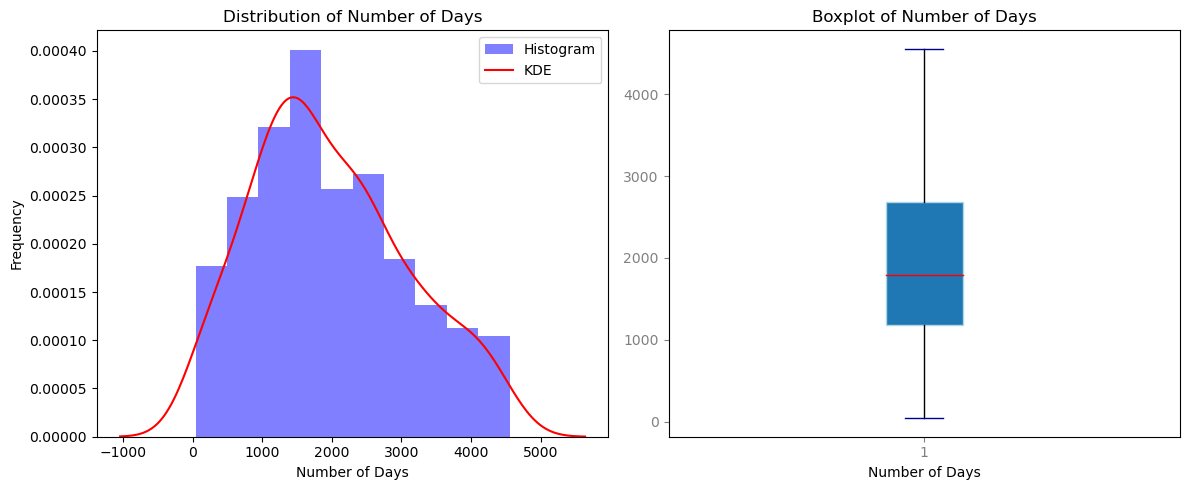

Mean number of days: 1979.1666666666667
Median number of days: 1788.0
Minimum number of days: 41
Maximum number of days: 4556


In [16]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram distribution of N_Days
axs[0].hist(df['N_Days'], density=True, alpha=0.5, color='blue', label='Histogram')
sns.kdeplot(df['N_Days'], color='red', ax=axs[0], label='KDE')

axs[0].set_title('Distribution of Number of Days')
axs[0].set_xlabel('Number of Days')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Define custom colors for the boxplot
box_color = 'lightblue'  # Color of the box
whisker_color = 'darkblue'  # Color of the whiskers
median_color = 'red'  # Color of the median line
flier_color = 'green'  # Color of the outliers

# Create a boxplot with custom colors
axs[1].boxplot(
    df['N_Days'],
    boxprops={'color': box_color},
    capprops={'color': whisker_color},
    medianprops={'color': median_color},
    flierprops={'markerfacecolor': flier_color, 'markeredgecolor': flier_color},
    patch_artist=True,  # Fill the box with color
)

axs[1].set_title('Boxplot of Number of Days')
axs[1].set_xlabel('Number of Days')

# Customize the x-axis and y-axis tick colors if needed
axs[1].tick_params(axis='x', colors='gray')
axs[1].tick_params(axis='y', colors='gray')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

mean_days = np.mean(df['N_Days'])
median_days = np.median(df['N_Days'])
min_days = np.min(df['N_Days'])
max_days = np.max(df['N_Days'])

print("Mean number of days:", mean_days)
print("Median number of days:", median_days)
print("Minimum number of days:", min_days)
print("Maximum number of days:", max_days)

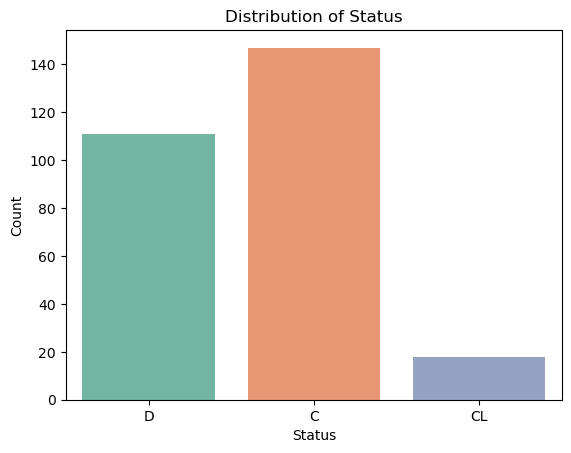

Death Rate: 40.22%.


In [17]:
# Create a count plot
sns.countplot(data=df, x='Status', palette='Set2')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Calculate death rate of patients
death = len(df[df.Status == 'D'])
death_rate = round((death / len(df))*100, 2)
print("Death Rate: "+ str(death_rate) + "%.")

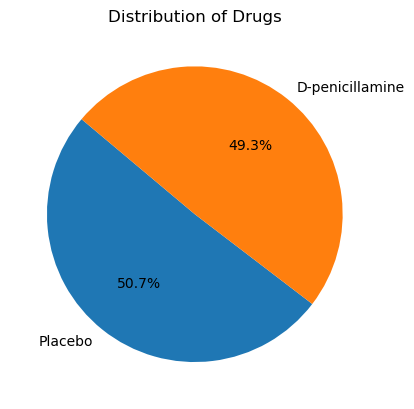

In [18]:
# Calculate the value counts for the 'Drug'
drug_counts = df['Drug'].value_counts()

# Create a pie chart
plt.pie(drug_counts, labels=drug_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Drugs')
plt.show()

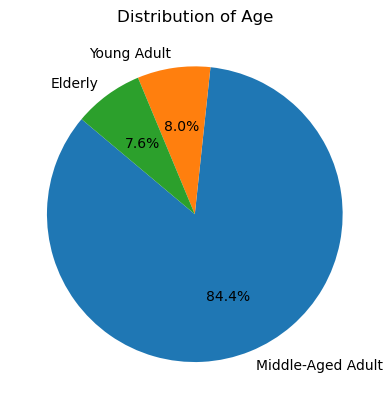

In [19]:
# Calculate the value counts for the 'Drug'
age_counts = df['Age'].value_counts()

# Create a pie chart
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age')
plt.show()

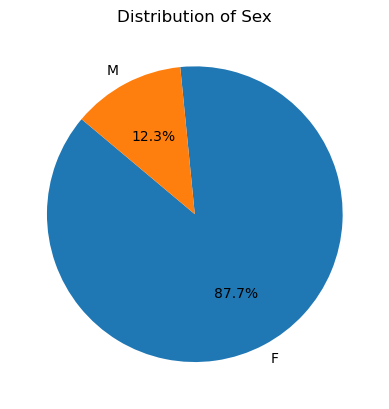

In [20]:
# Calculate the value counts for the 'Age'
sex_counts = df['Sex'].value_counts()

# Create a pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex')
plt.show()

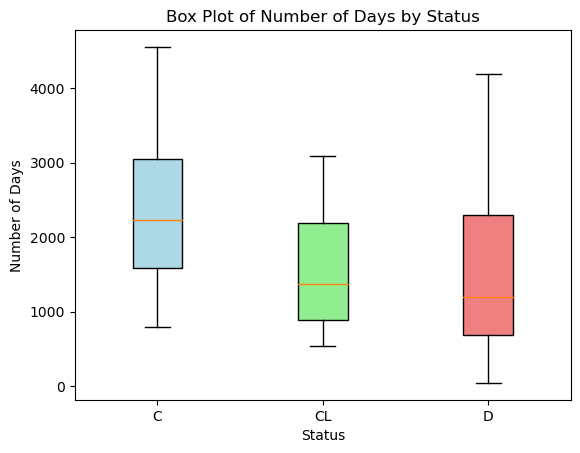

In [21]:
# Extract data for different 'Status' categories
c_days = df['N_Days'][df['Status'] == 'C']
cl_days = df['N_Days'][df['Status'] == 'CL']
d_days = df['N_Days'][df['Status'] == 'D']

# Create a list of data to be plotted
data_to_plot = [c_days, cl_days, d_days]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
boxplot = ax.boxplot(data_to_plot, labels=['C', 'CL', 'D'], patch_artist=True)

# Customize boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
# Add labels and title
ax.set_xlabel('Status')
ax.set_ylabel('Number of Days')
ax.set_title('Box Plot of Number of Days by Status')

# Show the plot
plt.show()


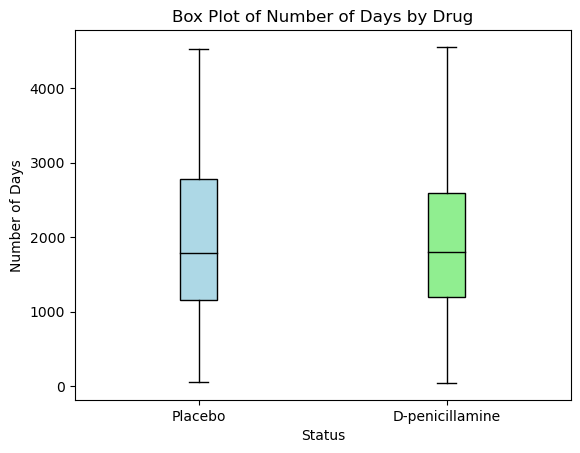

In [22]:
# Extract data for different drug categories
placebo_days = df['N_Days'][df['Drug'] == 'Placebo']
penicilline_days = df['N_Days'][df['Drug'] == 'D-penicillamine']

# Create a list of data to be plotted
data_to_plot = [placebo_days, penicilline_days]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
boxplot = ax.boxplot(data_to_plot, labels=['Placebo', 'D-penicillamine'], patch_artist=True)

# Customize boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customize the color of the median line
for median in boxplot['medians']:
    median.set_color('black')

# Add labels and title
ax.set_xlabel('Status')
ax.set_ylabel('Number of Days')
ax.set_title('Box Plot of Number of Days by Drug')

# Show the plot
plt.show()

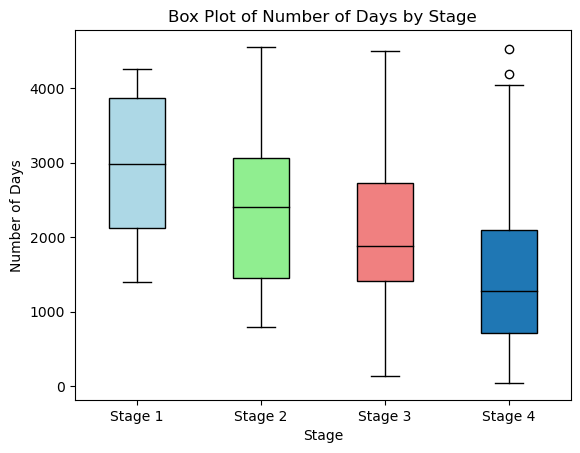

In [23]:
# Extract data for different drug categories
stage1_days = df['N_Days'][df['Stage'] == '1']
stage2_days = df['N_Days'][df['Stage'] == '2']
stage3_days = df['N_Days'][df['Stage'] == '3']
stage4_days = df['N_Days'][df['Stage'] == '4']

# Create a list of data to be plotted
data_to_plot = [stage1_days, stage2_days, stage3_days, stage4_days]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
boxplot = ax.boxplot(data_to_plot, labels=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], patch_artist=True)

# Customize boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customize the color of the median line
for median in boxplot['medians']:
    median.set_color('black')

# Add labels and title
ax.set_xlabel('Stage')
ax.set_ylabel('Number of Days')
ax.set_title('Box Plot of Number of Days by Stage')

# Show the plot
plt.show()

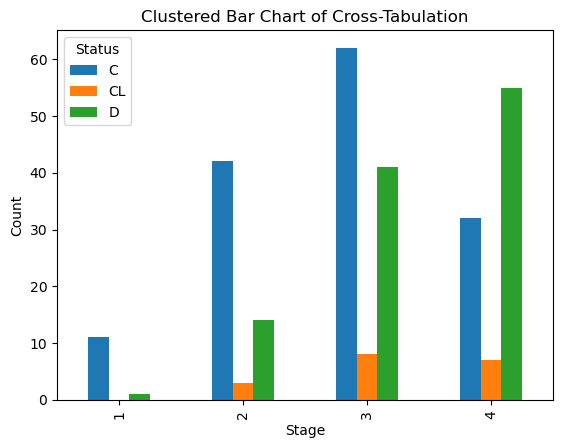

In [24]:
Xtab = pd.crosstab(df['Stage'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

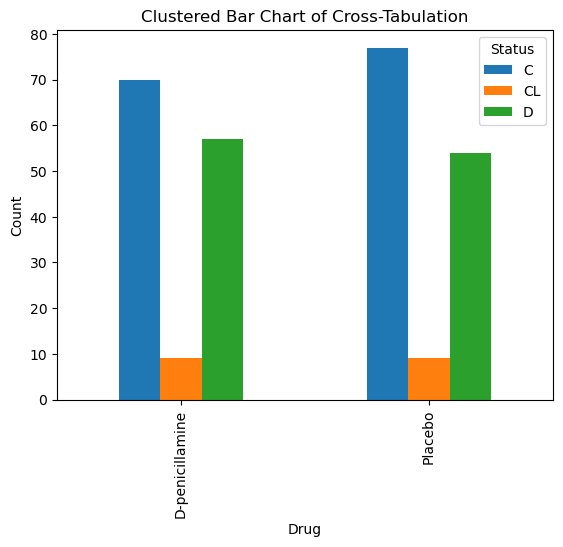

In [25]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Drug'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

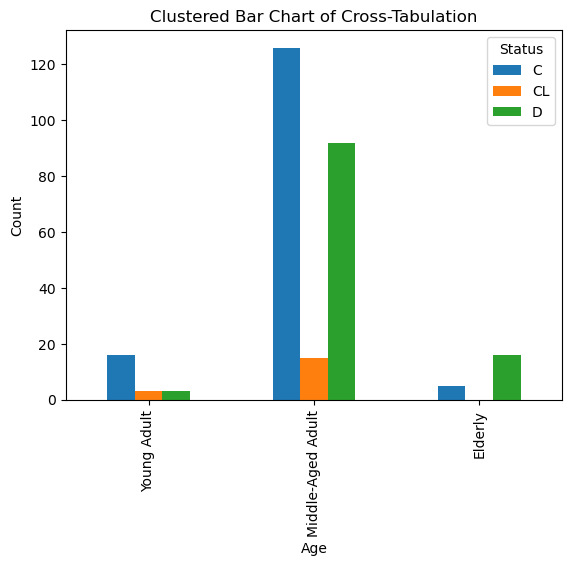

In [26]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Age'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

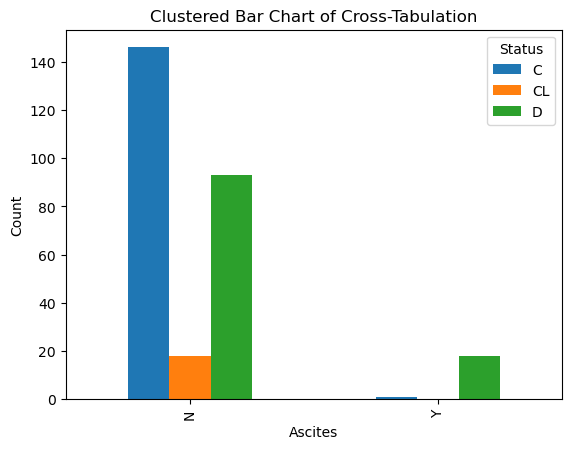

In [27]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Ascites'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Ascites")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

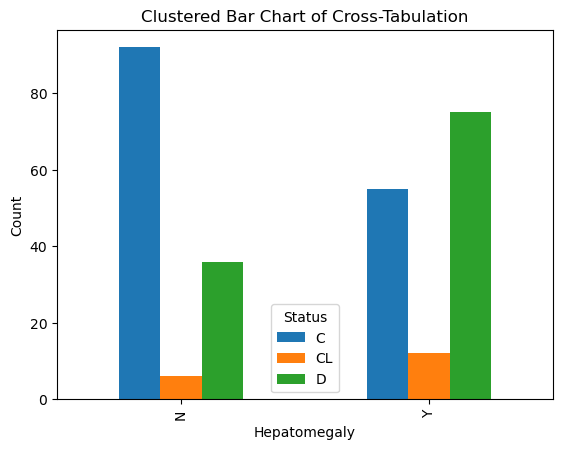

In [28]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Hepatomegaly'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Hepatomegaly")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

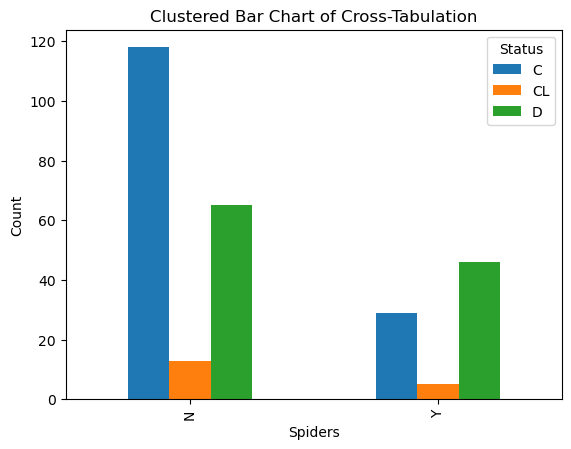

In [29]:
Xtab = pd.crosstab(df['Spiders'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Spiders")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

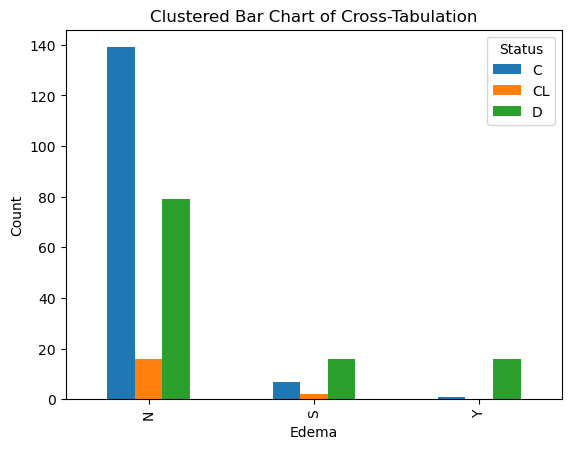

In [30]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Edema'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Edema")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

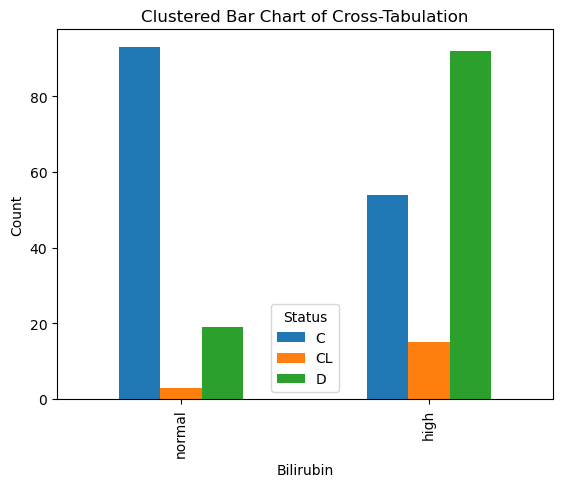

In [31]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Bilirubin'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Bilirubin")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

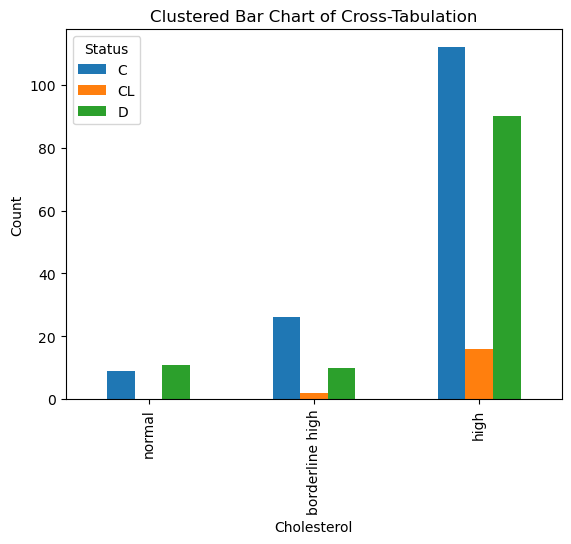

In [32]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Cholesterol'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

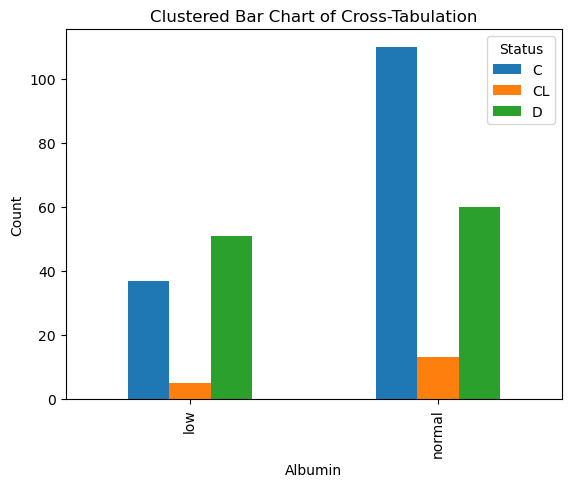

In [33]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Albumin'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Albumin")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

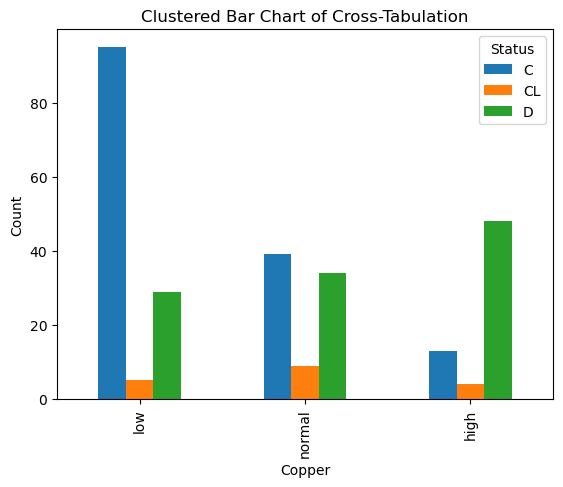

In [34]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Copper'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Copper")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

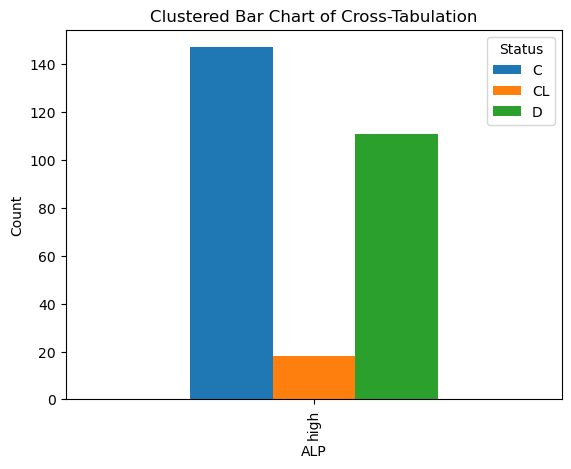

In [35]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['ALP'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("ALP")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

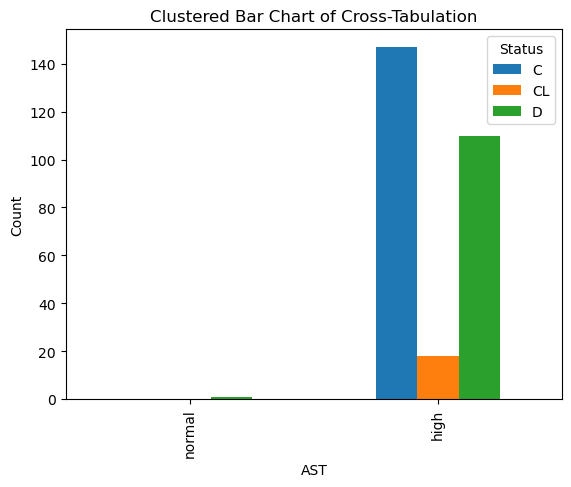

In [36]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['AST'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("AST")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

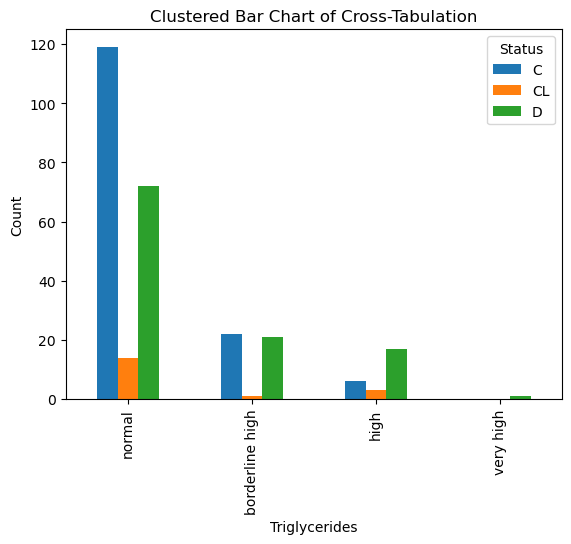

In [37]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Triglycerides'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Triglycerides")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

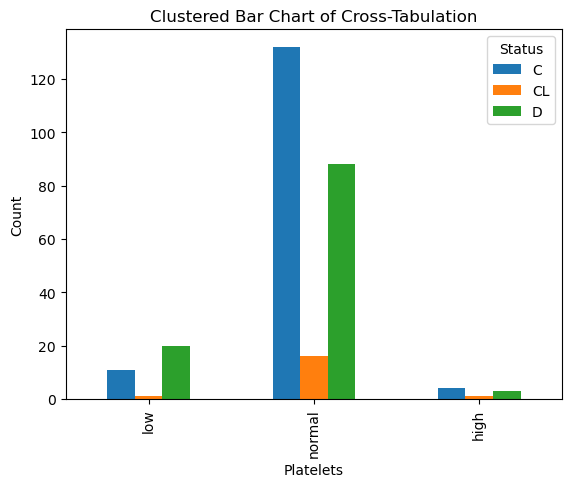

In [38]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Platelets'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Platelets")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

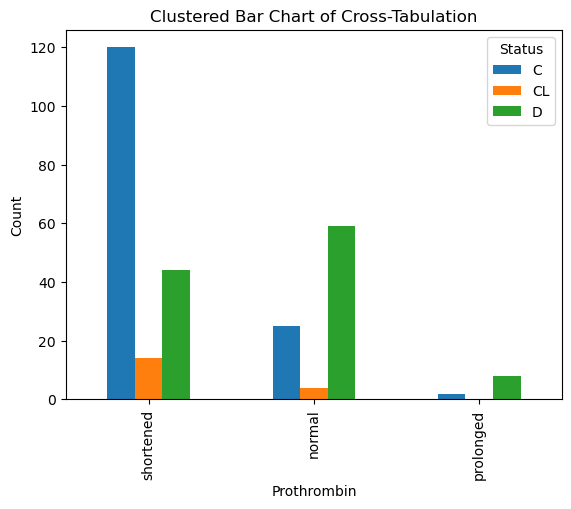

In [39]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Prothrombin'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Prothrombin")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

In [40]:
# Extract the specified columns into a new DataFrame
columns = df[['Stage', 'Age', 'Ascites', 'Hepatomegaly', 
              'Spiders', 'Edema', 'Bilirubin', 'Albumin', 
              'Copper', 'Cholesterol', 'Prothrombin', 'Status']]

# Perform one-hot encoding for the other columns
df = pd.get_dummies(columns, drop_first=True)

df.head()

,Stage_2,Stage_3,Stage_4,Age_Middle-Aged Adult,Age_Elderly,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,...,Albumin_normal,Albumin_high,Copper_normal,Copper_high,Cholesterol_borderline high,Cholesterol_high,Prothrombin_normal,Prothrombin_prolonged,Status_CL,Status_D
0,0,0,1,1,0,1,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,1,0,1,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,0,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,1,0,0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Stage_2                      276 non-null    uint8
 1   Stage_3                      276 non-null    uint8
 2   Stage_4                      276 non-null    uint8
 3   Age_Middle-Aged Adult        276 non-null    uint8
 4   Age_Elderly                  276 non-null    uint8
 5   Ascites_Y                    276 non-null    uint8
 6   Hepatomegaly_Y               276 non-null    uint8
 7   Spiders_Y                    276 non-null    uint8
 8   Edema_S                      276 non-null    uint8
 9   Edema_Y                      276 non-null    uint8
 10  Bilirubin_high               276 non-null    uint8
 11  Albumin_normal               276 non-null    uint8
 12  Albumin_high                 276 non-null    uint8
 13  Copper_normal                276 non-null    uint8

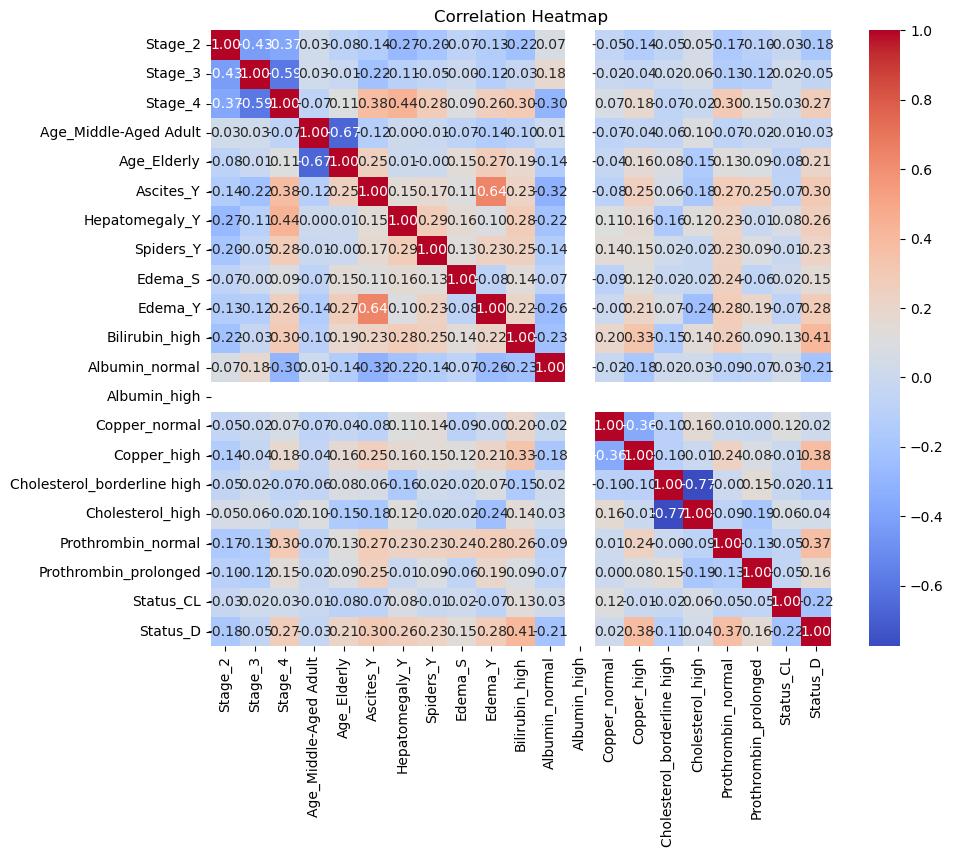

In [42]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()